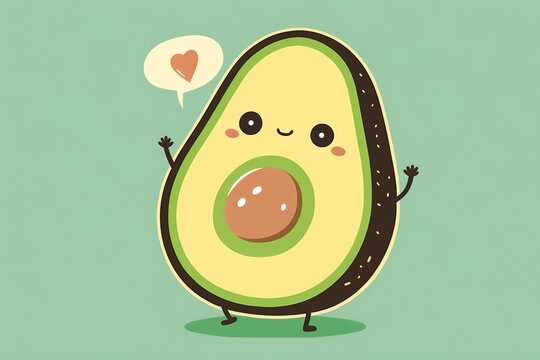

# **`About Dataset`**
## Context
It is a well known fact that Millenials LOVE Avocado Toast. It's also a well known fact that all Millenials live in their parents basements.

Clearly, they aren't buying home because they are buying too much Avocado Toast!

But maybe there's hope… if a Millenial could find a city with cheap avocados, they could live out the Millenial American Dream.


**Some relevant columns in the dataset:**

*   `Date` - The date of the observation
*   `AveragePrice` - the average price of a single avocado
*   `type` - conventional or organic
*   `year` - the year
*   `Region` - the city or region of the observation
*   `Total Volume` - Total number of avocados sold
*   `4046` - Total number of avocados with PLU 4046 sold
*   `4225` - Total number of avocados with PLU 4225 sold
*   `4770` - Total number of avocados with PLU 4770 sold

# `Load and Inspect the Data`

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('avocado.csv')

# Inspect data
print(data.head())
print(data.info())
print(data.describe())

   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015 

In [7]:
# Check for missing values
print("Missing Values:\n", data.isnull().sum())

# Identify unique values in categorical columns
for col in data.select_dtypes(include='object').columns:
    print(f"{col} unique values:\n", data[col].unique())

Missing Values:
 Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64
Date unique values:
 ['2015-12-27' '2015-12-20' '2015-12-13' '2015-12-06' '2015-11-29'
 '2015-11-22' '2015-11-15' '2015-11-08' '2015-11-01' '2015-10-25'
 '2015-10-18' '2015-10-11' '2015-10-04' '2015-09-27' '2015-09-20'
 '2015-09-13' '2015-09-06' '2015-08-30' '2015-08-23' '2015-08-16'
 '2015-08-09' '2015-08-02' '2015-07-26' '2015-07-19' '2015-07-12'
 '2015-07-05' '2015-06-28' '2015-06-21' '2015-06-14' '2015-06-07'
 '2015-05-31' '2015-05-24' '2015-05-17' '2015-05-10' '2015-05-03'
 '2015-04-26' '2015-04-19' '2015-04-12' '2015-04-05' '2015-03-29'
 '2015-03-22' '2015-03-15' '2015-03-08' '2015-03-01' '2015-02-22'
 '2015-02-15' '2015-02-08' '2015-02-01' '2015-01-25' '2015-01-18'
 '2015-01-11' '2015-01-04' '2016-12-2

# `Data Visualization`

*Target Distribution*

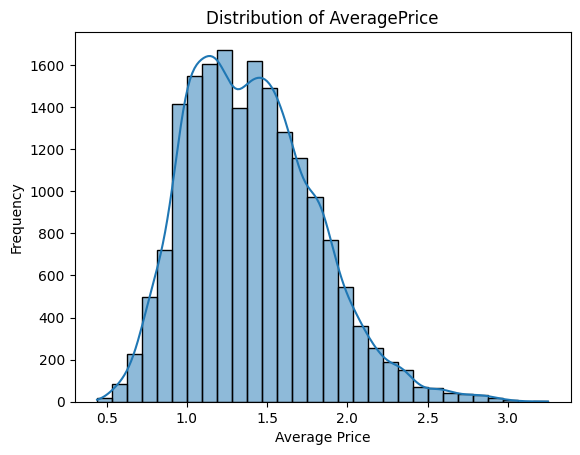

In [8]:
# Distribution of target variable (AveragePrice)
sns.histplot(data['AveragePrice'], kde=True, bins=30)
plt.title("Distribution of AveragePrice")
plt.xlabel("Average Price")
plt.ylabel("Frequency")
plt.show()


*Categorical vs. Numerical Analysis*

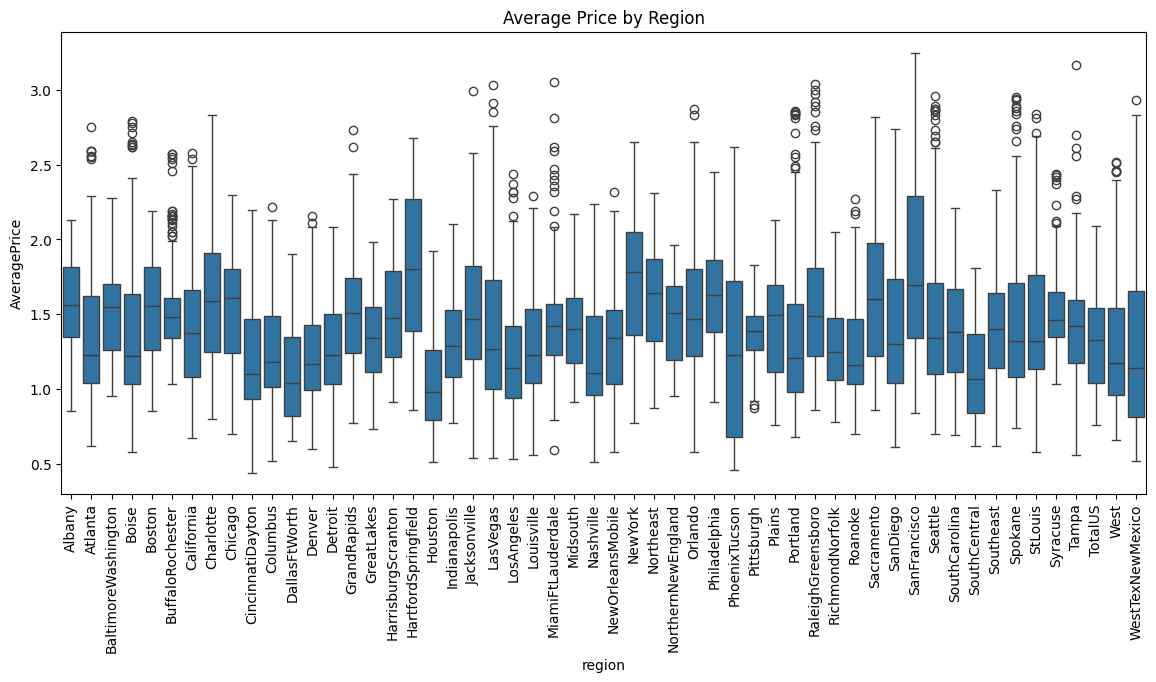

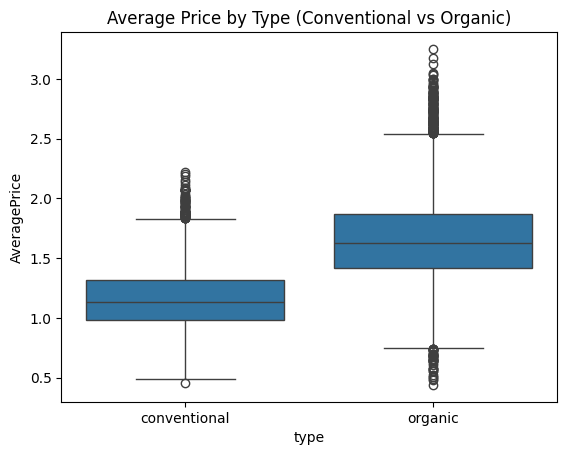

In [9]:
# Average Price by Region
plt.figure(figsize=(14, 6))
sns.boxplot(data=data, x='region', y='AveragePrice')
plt.xticks(rotation=90)
plt.title("Average Price by Region")
plt.show()

# Average Price by Type
sns.boxplot(data=data, x='type', y='AveragePrice')
plt.title("Average Price by Type (Conventional vs Organic)")
plt.show()


*Time-Series Analysis*

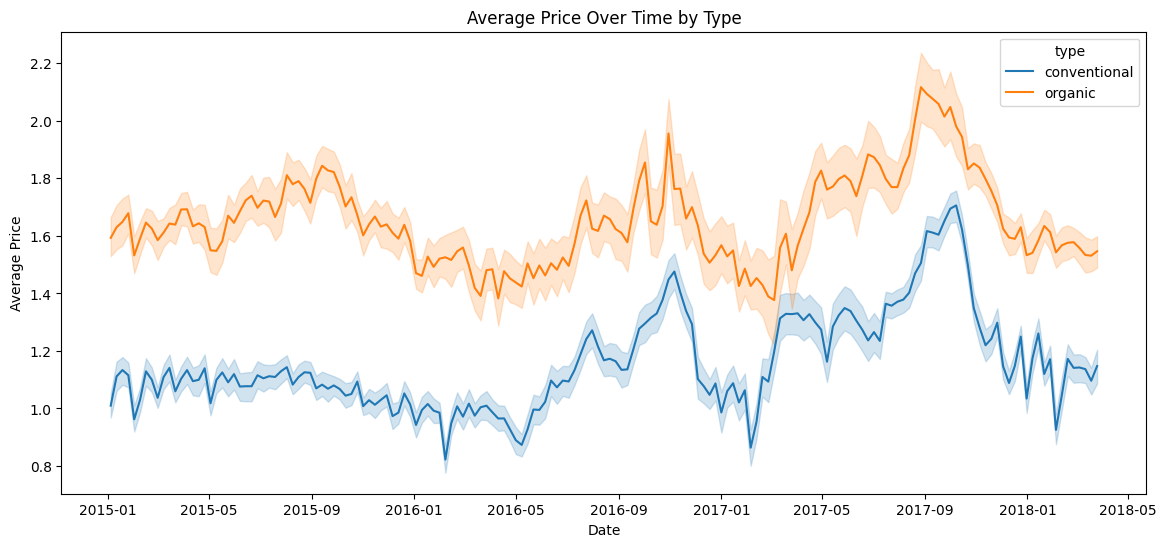

In [10]:
# Convert 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Average Price over Time
plt.figure(figsize=(14, 6))
sns.lineplot(data=data, x='Date', y='AveragePrice', hue='type')
plt.title("Average Price Over Time by Type")
plt.xlabel("Date")
plt.ylabel("Average Price")
plt.show()


# `Data Preprocessing`

Feature Engineering
*   Date Features: Extract year, month, and day from the `Date` column

In [11]:
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day

*   Encoding Categorical Variables

In [12]:
# One-hot encode 'region' and 'type'
data = pd.get_dummies(data, columns=['region', 'type'], drop_first=True)
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,...,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico,type_organic
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,...,False,False,False,False,False,False,False,False,False,False
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,...,False,False,False,False,False,False,False,False,False,False
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,...,False,False,False,False,False,False,False,False,False,False
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,...,False,False,False,False,False,False,False,False,False,False
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,...,False,False,False,False,False,False,False,False,False,False


Drop Unnecessary Columns

In [13]:
data = data.drop(columns=['Date'])

Train-Test Split


In [14]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['AveragePrice'])
y = data['AveragePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Scaling and Normalization


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
data.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,...,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico,type_organic
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,...,False,False,False,False,False,False,False,False,False,False
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,...,False,False,False,False,False,False,False,False,False,False
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,...,False,False,False,False,False,False,False,False,False,False
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,...,False,False,False,False,False,False,False,False,False,False
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,...,False,False,False,False,False,False,False,False,False,False


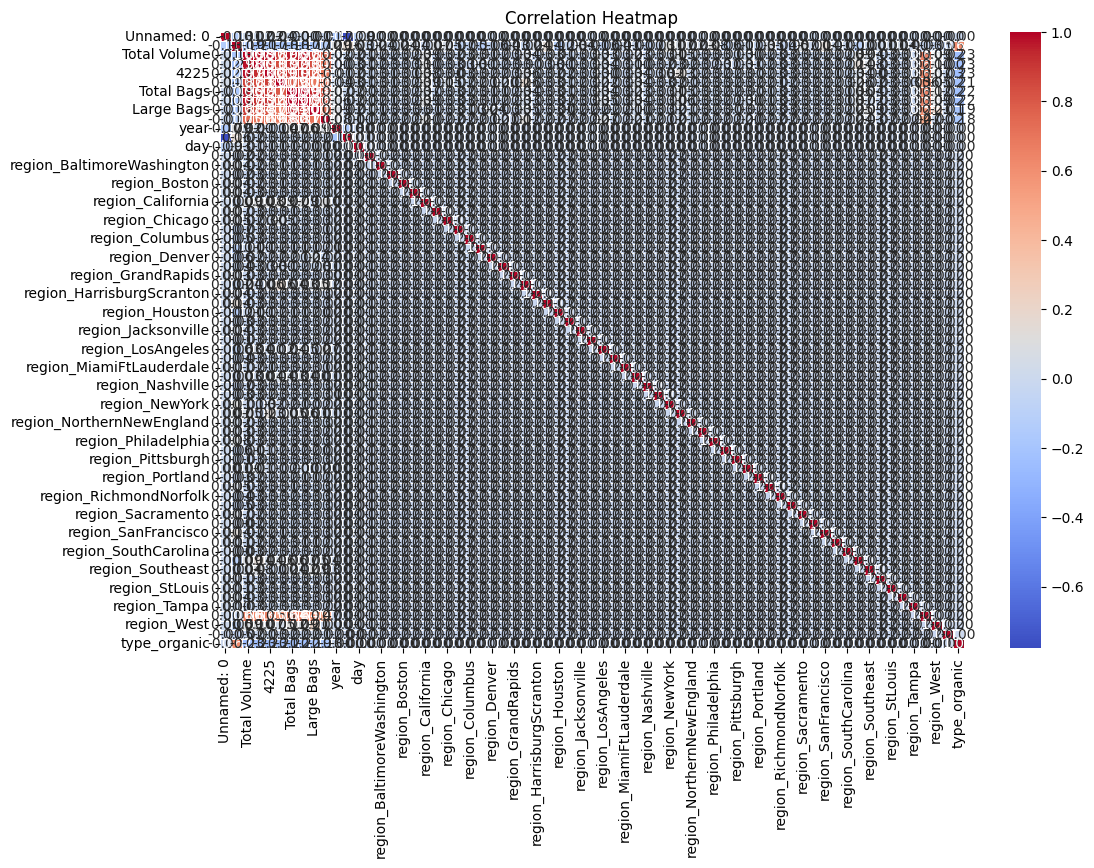

In [16]:
# Correlation matrix
corr_matrix = data.corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


# `Model Training and Evaluation`

In [24]:
from yellowbrick.regressor import ResidualsPlot

def residuals_plot(train_model):
    fig = plt.figure(figsize=(18, 12), dpi=100)
    visual = ResidualsPlot(train_model, hist=True, qqplot=False)
    visual.score(X_test, y_test)
    visual.show()

Linear Regression

Linear Regression:
MSE: 0.06522735943894344
R2 Score: 0.5940266908104064


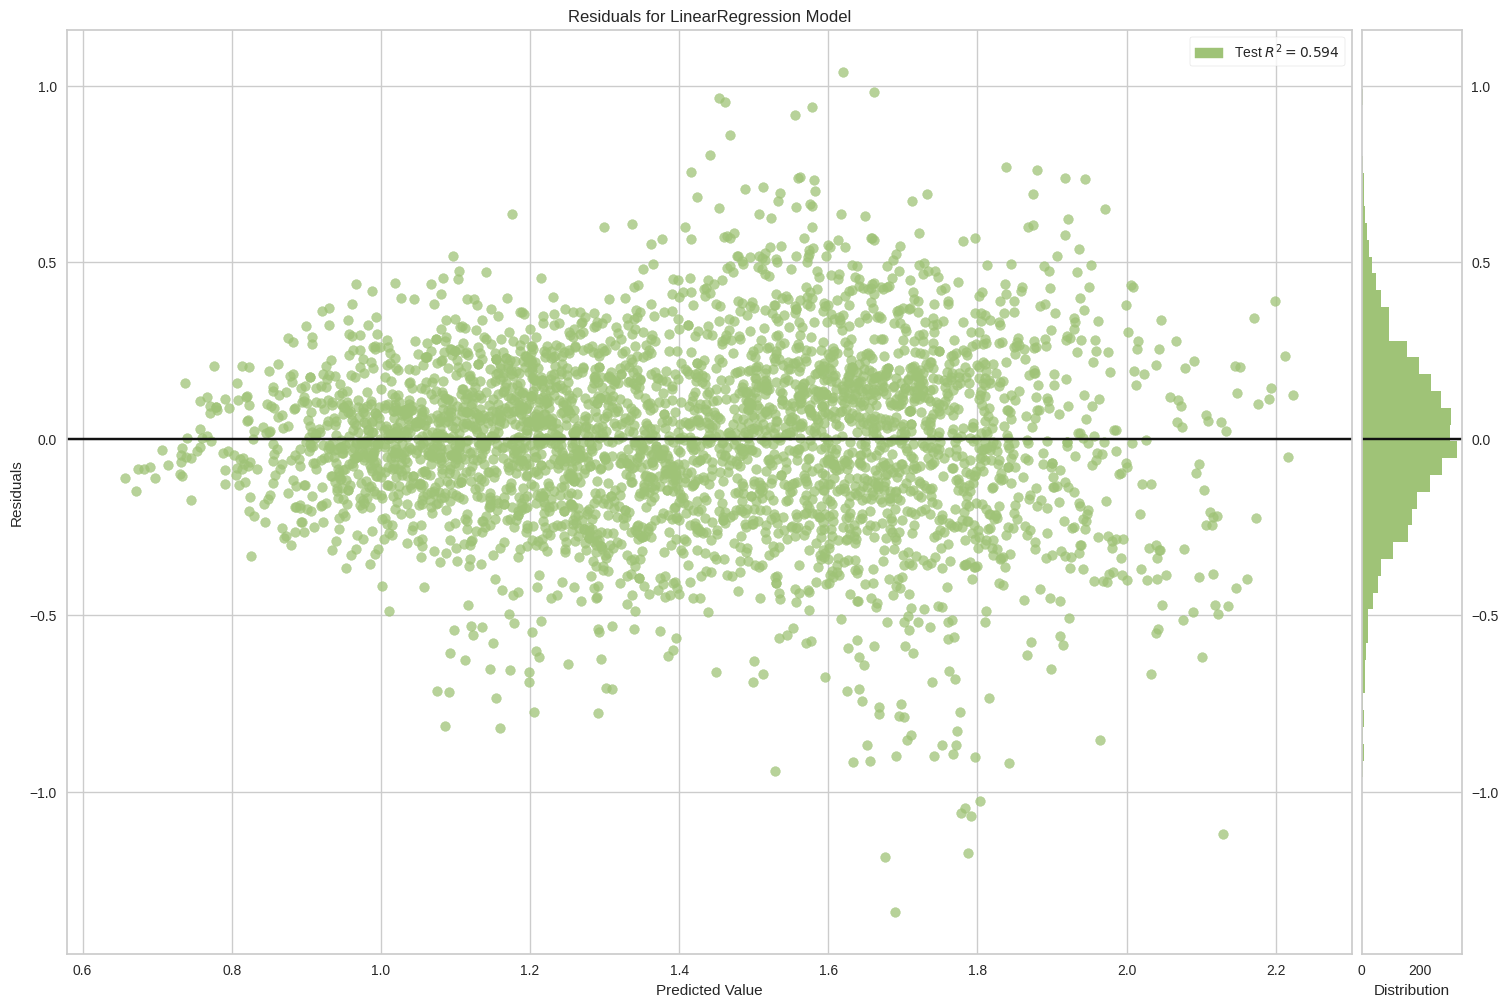

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluation Metrics
print("Linear Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R2 Score:", r2_score(y_test, y_pred_lr))
residuals_plot(lr)

Random Forest Regressor

Random Forest Regressor:
MSE: 0.0145783806
R2 Score: 0.9092645560740908


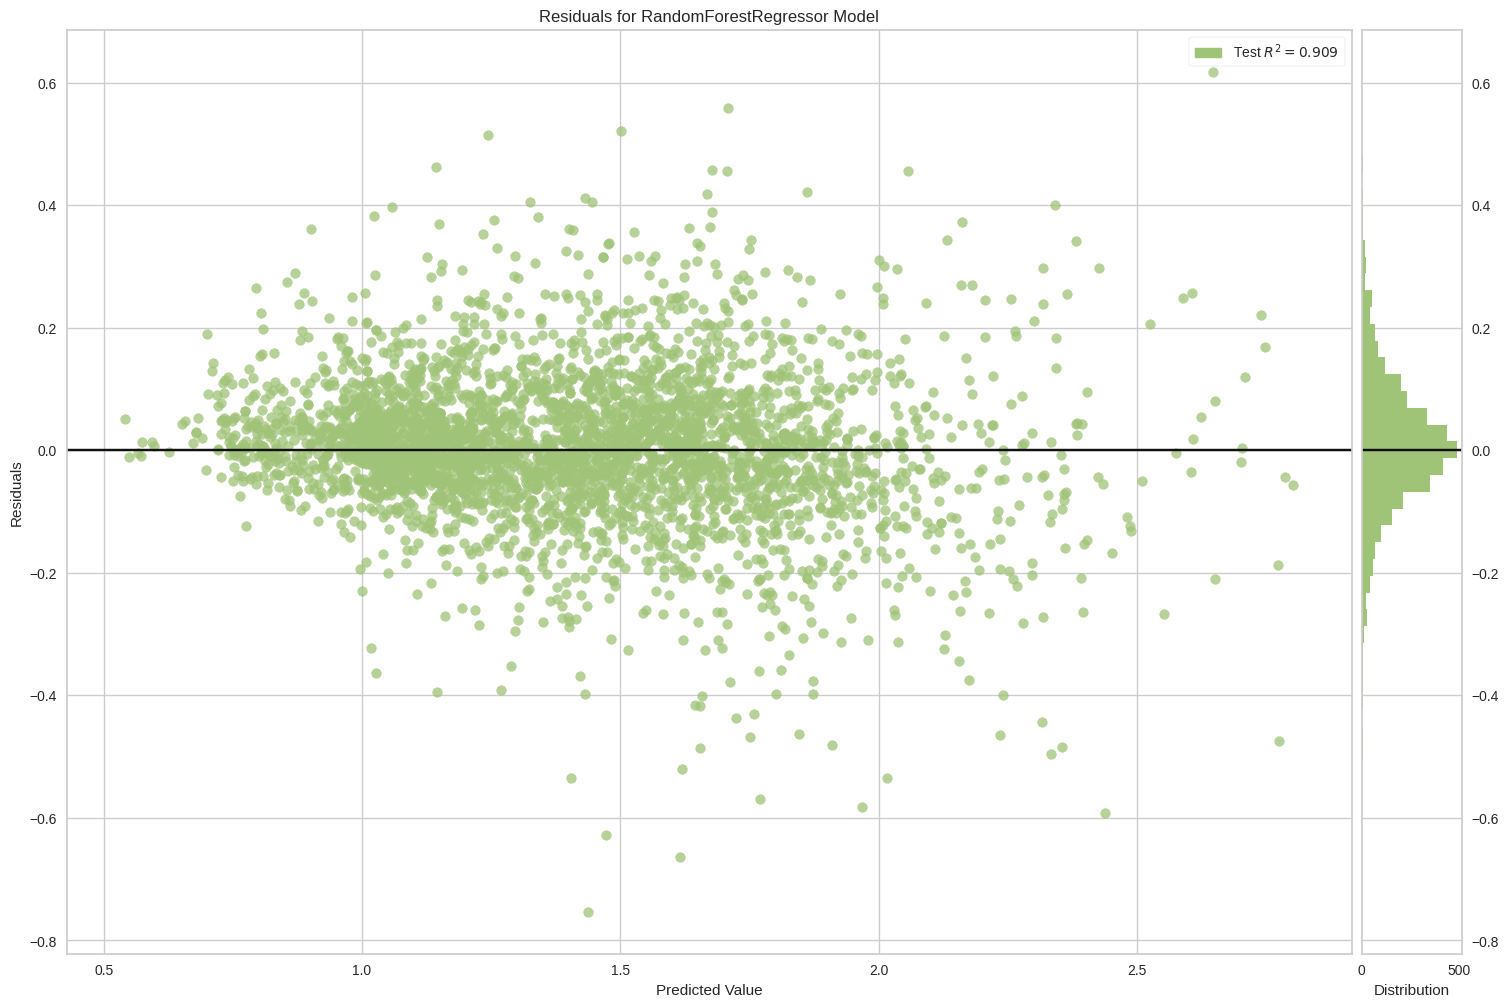

In [28]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation Metrics
print("Random Forest Regressor:")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))
residuals_plot(rf)

Gradient Boosting Regressor

Gradient Boosting Regressor:
MSE: 0.0421557271844374
R2 Score: 0.7376239017864957


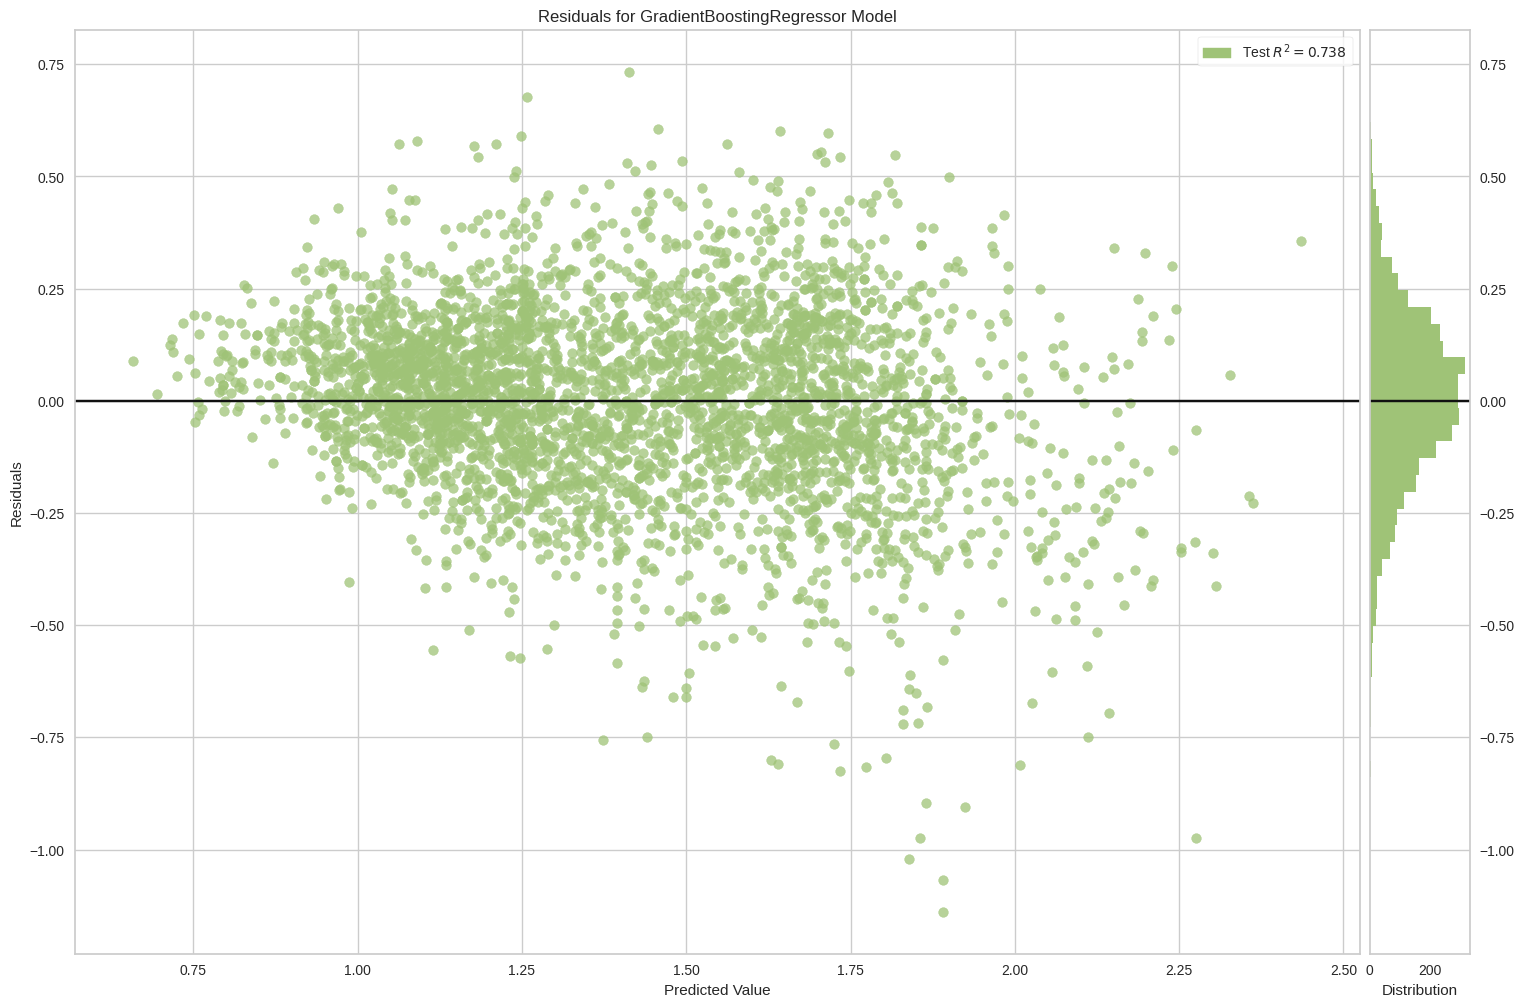

In [27]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

# Evaluation Metrics
print("Gradient Boosting Regressor:")
print("MSE:", mean_squared_error(y_test, y_pred_gbr))
print("R2 Score:", r2_score(y_test, y_pred_gbr))
residuals_plot(gbr)

Artificial Neural Network (ANN)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Build Model
ann = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile Model
ann.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train Model
history = ann.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)

# Evaluate Model
ann_loss, ann_mae = ann.evaluate(X_test, y_test, verbose=0)
print("ANN Loss:", ann_loss)
print("ANN MAE:", ann_mae)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
457/457 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.2625 - mae: 0.3689 - val_loss: 0.0794 - val_mae: 0.2116
Epoch 2/50
457/457 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0952 - mae: 0.2360 - val_loss: 0.0665 - val_mae: 0.1945
Epoch 3/50
457/457 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0744 - mae: 0.2074 - val_loss: 0.0728 - val_mae: 0.2049
Epoch 4/50
457/457 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0712 - mae: 0.2002 - val_loss: 0.0701 - val_mae: 0.1965
Epoch 5/50
457/457 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0619 - mae: 0.1870 - val_loss: 0.0639 - val_mae: 0.1895
Epoch 6/50
457/457 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0577 - mae: 0.1808 - val_loss: 0.0535 - val_mae: 0.1732
Epoch 7/50
457/457 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0549 - mae: 0.1752 - val_loss: 0.0640 - val_mae: 0.1890
Epoch 8/50
457/457 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0510 - mae: 0.1683 - val_loss: 0.0601 - val_mae: 0.1849
Epoch 9/50
457/457 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - lo

# `Model Comparison`

*Visualization of Metrics*

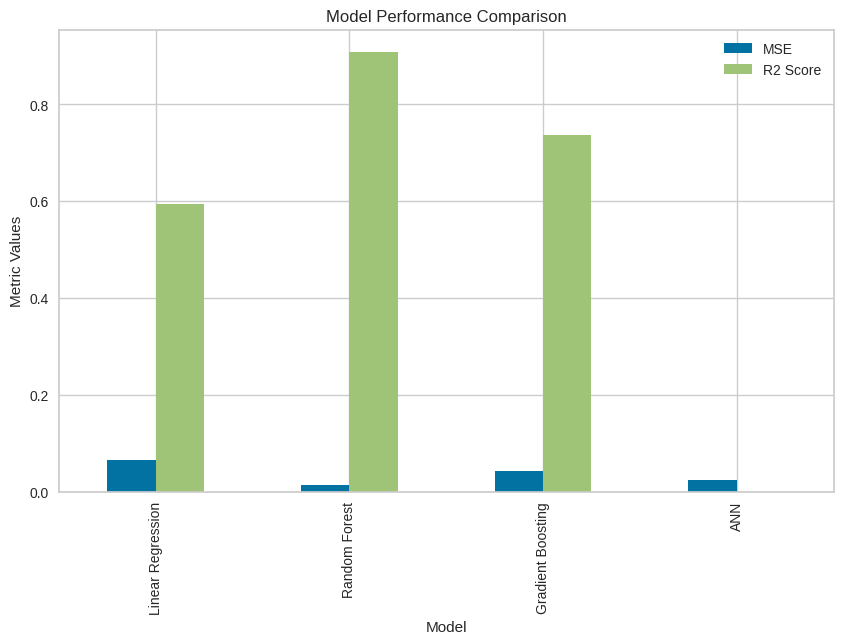

In [30]:
# Create a DataFrame for comparison
metrics = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "Gradient Boosting", "ANN"],
    "MSE": [mean_squared_error(y_test, y_pred_lr),
            mean_squared_error(y_test, y_pred_rf),
            mean_squared_error(y_test, y_pred_gbr),
            ann_loss],
    "R2 Score": [r2_score(y_test, y_pred_lr),
                 r2_score(y_test, y_pred_rf),
                 r2_score(y_test, y_pred_gbr),
                 None]  # ANN R2 can be manually computed if needed
})

# Bar Plot
metrics.plot(kind='bar', x='Model', y=['MSE', 'R2 Score'], figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Metric Values")
plt.show()


# `Advanced Feature Engineering`

Interaction Features

Create interaction terms to capture relationships between features

In [31]:
data['Total_Volume_by_Price'] = data['Total Volume'] * data['AveragePrice']
data['Volume_Per_4046'] = data['Total Volume'] / (data['4046'] + 1e-9)

Log Transformations

Handle skewed features using log transformations

In [32]:
skewed_features = ['Total Volume', '4046', '4225', '4770', 'Total Bags']
for feature in skewed_features:
    data[feature] = np.log1p(data[feature])

# `Other Models`

Train and Evaluate Multiple Models:
*   Support Vector Machines (SVM): Use a kernel like RBF or linear.
*   Decision Tree Regressor: Simple tree-based model to evaluate feature splits.
*   K-Nearest Neighbors (KNN): Measure proximity for regression.
*   XGBoost: Advanced gradient boosting.
*   CatBoost or LightGBM: Efficient gradient boosting alternatives.

In [34]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.3 MB/s eta 0:00:00


In [35]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
import numpy as np

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [36]:
!pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 15.3 MB/s eta 0:00:00


In [40]:
# Function to evaluate and print metrics
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name}:")
    print(f"  MSE: {mse:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R^2: {r2:.2f}")

In [41]:
# Support Vector Machines
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr.fit(X_train, y_train)
evaluate_model(svr, X_test, y_test, "Support Vector Machines")

Support Vector Machines:
  MSE: 0.03
  RMSE: 0.16
  R^2: 0.84


In [42]:
# Decision Tree Regressor
dt = DecisionTreeRegressor(max_depth=10, random_state=42)
dt.fit(X_train, y_train)
evaluate_model(dt, X_test, y_test, "Decision Tree Regressor")

Decision Tree Regressor:
  MSE: 0.04
  RMSE: 0.20
  R^2: 0.75


In [43]:
# K-Nearest Neighbors
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
evaluate_model(knn, X_test, y_test, "K-Nearest Neighbors")

K-Nearest Neighbors:
  MSE: 0.03
  RMSE: 0.18
  R^2: 0.81


In [44]:
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
evaluate_model(rf, X_test, y_test, "Random Forest Regressor")

Random Forest Regressor:
  MSE: 0.03
  RMSE: 0.17
  R^2: 0.83


In [45]:
# XGBoost Regressor
xgboost_model = xgb.XGBRegressor(n_estimators=100, max_depth=10, learning_rate=0.1, random_state=42)
xgboost_model.fit(X_train, y_train)
evaluate_model(xgboost_model, X_test, y_test, "XGBoost Regressor")

XGBoost Regressor:
  MSE: 0.01
  RMSE: 0.11
  R^2: 0.92


In [46]:
# CatBoost Regressor
catboost_model = CatBoostRegressor(iterations=500, depth=10, learning_rate=0.1, random_seed=42, verbose=0)
catboost_model.fit(X_train, y_train)
evaluate_model(catboost_model, X_test, y_test, "CatBoost Regressor")

CatBoost Regressor:
  MSE: 0.01
  RMSE: 0.10
  R^2: 0.94


In [47]:
# LightGBM Regressor
lgbm = LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=42)
lgbm.fit(X_train, y_train)
evaluate_model(lgbm, X_test, y_test, "LightGBM Regressor")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004714 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2306
[LightGBM] [Info] Number of data points in the train set: 14599, number of used features: 66
[LightGBM] [Info] Start training from score 1.404860


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LightGBM Regressor:
  MSE: 0.02
  RMSE: 0.14
  R^2: 0.89


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


# `Hyperparameter Tuning`

Grid Search for Random Forest

In [48]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   9.5s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   9.5s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   8.6s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   9.5s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   9.4s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=  18.0s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=  18.9s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=  18.0s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=  18.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=  18.9s
[CV] END max_depth=10, min_samples_split=2, n_estimators=300; total time=  27.4s
[CV] END max_depth=10, min_samples_split=2, n_e

Bayesian Optimization for Gradient Boosting

In [ ]:
from skopt import BayesSearchCV

gbr = GradientBoostingRegressor(random_state=42)
search_space = {
    'learning_rate': (0.01, 0.3),
    'n_estimators': (100, 500),
    'max_depth': (3, 10)
}

bayes_search = BayesSearchCV(gbr, search_space, n_iter=32, cv=3, scoring='neg_mean_squared_error', random_state=42)
bayes_search.fit(X_train, y_train)

best_gbr = bayes_search.best_estimator_
print("Best Parameters:", bayes_search.best_params_)


# `Deployment-Ready Code`

Save the Model

In [ ]:
import joblib

# Save the best model
joblib.dump(best_rf, 'best_rf_model.pkl')


Load the Model for Predictions

In [ ]:
# Load the model
loaded_model = joblib.load('best_rf_model.pkl')

# Make predictions
predictions = loaded_model.predict(X_test)


**Build an API for Model Predictions**

Use Flask for a lightweight API deployment

In [ ]:
from flask import Flask, request, jsonify
import joblib
import numpy as np

app = Flask(__name__)
model = joblib.load('best_rf_model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    features = np.array(data['features']).reshape(1, -1)
    prediction = model.predict(features)
    return jsonify({'prediction': prediction.tolist()})

if __name__ == '__main__':
    app.run(debug=True)
